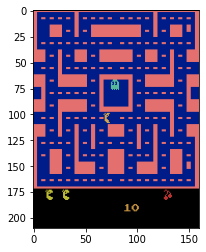

In [1]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make("MsPacman-v0")
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)